# Credit Card analysis - Case Study

#### Business Problem: 

Mr. xyz, CEO, wants to evaluate areas of bankruptcy, fraud, and 
collections, respond to customer requests for help with proactive offers and service.

Following are some of Mr. xyz’s questions to a Consultant (like you) to understand the 
customers spend & repayment behavior.
1. In the given dataset,
  - a. In case age is less than 18, replace it with mean of age values.
  - b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
       (customer’s limit provided in acquisition table is the per transaction limit on his card)
  - c. Incase the repayment amount is more than the limit, replace the repayment with the 
       limit.
2. From the given dataset create the following summaries:
  - a. How many distinct customers exist?
  - b. How many distinct categories exist?
  - c. What is the average monthly spend by customers?
  - d. What is the average monthly repayment by customers?
  - e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
  - f. What are the top 5 product types?
  - g. Which city is having maximum spend?
  - h. Which age group is spending more money?
  - i. Who are the top 10 customers in terms of repayment?
3. Calculate the city wise spend on each product on yearly basis. Also include a graphical 
    representation for the same.
4. Create graphs for
 - a. Monthly comparison of total spends, city wise
 - b. Comparison of yearly spend on air tickets
 - c. Comparison of monthly spend for each product (look for any seasonality
      that exists in terms of spend)
5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

#### Given data:

1. Customer data (Customer Acqusition.csv)
2. Credit card repayments (Repayment.csv)
3. Usage of Card (spend.csv)

#### Utilising the above given data the following report is made to answer business questions. 

##### Importing necessary packages for the report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
file_path = 'E:/zoho/AnalytixLabs Notes - downloads/Case Studies/Python Case Study 2 Credit card Study/'

##### Getting information

In [3]:
cust_acq = pd.read_csv( file_path + 'Customer Acqusition.csv', delimiter = ',' )
repay = pd.read_csv(file_path + 'Repayment.csv', delimiter = ',')
expen = pd.read_csv(file_path + 'spend.csv', delimiter = ',')

In [4]:
expen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [5]:
cust_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [6]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [7]:
cust_acq.replace('Platimum', 'Platinum', inplace = True)
cust_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platinum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platinum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platinum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platinum,10002.0,C22,Self Employed


##### cleaning data for analysis

In [8]:
repay.dropna( axis = 1, how = 'all', inplace = True)
repay.dropna(axis = 0, how = 'all', inplace = True)
repay.iloc[0,0] = 1.0
repay

,SL No:,Customer,Month,Amount
0,1.0,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


##### Changes to be made on Mr. Xyz's request

In [9]:
# Q1) a:In case age is less than 18, replace it with mean of age values.
asub = cust_acq.loc[:, 'Age'].mean().round().astype(np.int64)
asub

46

In [10]:
cust_acq[(cust_acq.Age < 18)]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,13,COCHIN,Platinum,500000.0,C23,Govt
62,63,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,16,BOMBAY,Platinum,10001.0,C32,Self Employed
89,90,A90,16,COCHIN,Gold,500000.0,C13,Govt


In [11]:
inx = [13,40,62,67,69,89]
inx

[13, 40, 62, 67, 69, 89]

In [12]:
cust_acq.loc[:, 'Age'] = cust_acq['Age'].apply(lambda x : asub if x <18 else x)
cust_acq.iloc[inx, :]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,46,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,46,COCHIN,Platinum,500000.0,C23,Govt
62,63,A63,46,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,46,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,46,BOMBAY,Platinum,10001.0,C32,Self Employed
89,90,A90,46,COCHIN,Gold,500000.0,C13,Govt


In [13]:
# Q1) (b,c) Preparation of dataset.

m1 = expen.merge(right = repay, how = 'left', left_on = ['Sl No:', 'Customer'], right_on = ['SL No:', 'Customer'], 
                     suffixes = ('_expen', '_repay') )
cred_df = cust_acq.merge(right = m1, how = 'left', on = 'Customer')
cred_df.drop( columns = ['Sl No:', 'SL No:'], inplace = True)
cred_df


,No,Customer,Age,City,Product,Limit,Company,Segment,Month_expen,Type,Amount_expen,Month_repay,Amount_repay
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,3-Jan-04,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,15-Jan-04,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,25-Jan-04,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,25-Jan-04,310992.30
1496,97,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26,12-Jan-04,121874.90
1497,98,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06,3-Jan-04,337815.57
1498,99,A99,35,CALCUTTA,Platinum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22,15-Jan-04,25682.73


In [14]:
b1 = cred_df[(cred_df.Amount_expen > cred_df.Limit)]
print(b1.shape)

(607, 13)


In [15]:
# Q1) b: In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 

cred_df.loc[:,'Amount_expen'] = np.where(cred_df['Amount_expen'] > cred_df['Limit'], cred_df['Limit']*0.5,
                                             cred_df['Amount_expen'])
cred_df.iloc[(b1.index.to_list()), :]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_expen,Type,Amount_expen,Month_repay,Amount_repay
18,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,50000.0,3-Jan-04,185955.07
19,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,50000.0,28-Feb-05,412783.34
20,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,50000.0,6-Apr-04,148038.67
21,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,50000.0,23-Nov-04,179144.68
22,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,50000.0,22-Nov-05,10274.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,50001.5,30-Mar-06,462283.02
1496,97,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.0,12-Jan-04,121874.90
1497,98,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.5,3-Jan-04,337815.57
1498,99,A99,35,CALCUTTA,Platinum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.0,15-Jan-04,25682.73


In [16]:
# Q1) c: Incase the repayment amount is more than the limit, replace the repayment with the limit.

b2 = cred_df[(cred_df.Amount_repay > cred_df.Limit)]
print(b2.shape)

(600, 13)


In [17]:
cred_df.loc[:, 'Amount_repay'] = np.where(cred_df['Amount_repay'] > cred_df['Limit'], cred_df['Limit'], cred_df['Amount_repay'])
cred_df.iloc[(b2.index.to_list()), :]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_expen,Type,Amount_expen,Month_repay,Amount_repay
18,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,50000.00,3-Jan-04,100000.0
19,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,50000.00,28-Feb-05,100000.0
20,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,50000.00,6-Apr-04,100000.0
21,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,50000.00,23-Nov-04,100000.0
23,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Nov-06,MOVIE TICKET,75728.35,3-Aug-05,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,50001.50,30-Mar-06,100003.0
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,25-Jan-04,100000.0
1496,97,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,12-Jan-04,10000.0
1497,98,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,3-Jan-04,10001.0


##### Summaries extracted from the dataset.

In [18]:
# Q2) From the above dataset create the following summaries:

# Q2) a: How many distinct customers exist?

print('The dataset has', cred_df['Customer'].unique().size, 'Distinct Customers.')

The dataset has 100 Distinct Customers.


In [19]:
# Q2) b: How many distinct categories exist?
print('The dataset contains', cred_df['Product'].unique().size, 'Distinct Products being used.')
print('There are', cred_df['Segment'].unique().size, 'Segments of Customers.')
print(cred_df['Type'].unique().size, 'Types of service areas have been identified.')

The dataset contains 3 Distinct Products being used.
There are 5 Segments of Customers.
15 Types of service areas have been identified.


In [20]:
# Q2) c: What is the average monthly spend by customers?

# coverting to datetime format
cred_df['Month_expen'] = pd.to_datetime(cred_df.Month_expen, format = '%d-%b-%y')
cred_df['Month_repay'] = pd.to_datetime(cred_df.Month_repay, format = '%d-%b-%y')

# Extracting month and year from date(for Spend and Repayment)
cred_df['expen_mon'] = cred_df.Month_expen.dt.month
cred_df['expen_yr'] = cred_df.Month_expen.dt.year
cred_df['repay_mon'] = cred_df.Month_repay.dt.month
cred_df['repay_yr'] = cred_df.Month_repay.dt.year

# Average Table
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cred_df.loc[:,['expen_yr', 'expen_mon', 'Amount_expen']].groupby(by = ['expen_yr','expen_mon']).mean()


Amount_expen
expen_yr expen_mon              
2004     1             144233.92
         2             136998.28
         3             133708.09
         4             124621.98
         5             153326.95
         9             171579.26
         11             79642.08
2005     1             192271.67
         2             154334.42
         4             146430.92
         5             154625.80
         6             190726.48
         7             120803.09
         8             141707.44
         9             109423.78
         10             89879.42
         11            178120.21
         12             84416.00
2006     1             136312.52
         2             148478.99
         3             131720.29
         4             134743.70
         5             143693.69
         6             155971.50
         7             189088.68
         8             213863.92
         9             142392.07
         10            172156.29
         11            144283.95
         12            150129.36

In [21]:
# Q2) d: What is the average monthly repayment by customers?

cred_df.loc[:,['repay_yr', 'repay_mon', 'Amount_repay']].groupby(by = ['repay_yr','repay_mon']).mean()

Amount_repay
repay_yr repay_mon              
2004     1             159971.50
         2             125612.51
         3             177767.95
         4             175632.66
         5             151310.40
         9             118926.03
         11            119226.58
2005     1             181260.75
         2             157356.79
         4             121163.45
         5             200121.85
         6              97052.38
         7             149944.93
         8             149984.10
         9              73559.96
         10            136268.27
         11            169225.88
         12            179119.05
2006     1             204422.04
         2             188198.17
         3             154861.95
         4             180529.32
         5             171270.32
         6             165429.07
         7             170152.78
         8             161553.50
         9             199024.57
         10            203969.59
         11            145565.17
         12            201158.94

In [22]:
# Q2) e: If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 

cred_df['Profit'] = np.where((cred_df.Amount_repay - cred_df.Amount_expen) > 0, cred_df.Amount_repay - cred_df.Amount_expen, 0)
cred_df.loc[:,['repay_yr', 'repay_mon','Profit']].groupby(by = ['repay_yr', 'repay_mon']).sum()

Profit
repay_yr repay_mon            
2004     1         13785828.56
         2          1582774.85
         3           745816.00
         4          2364913.20
         5           853308.44
         9           486007.22
         11         1042692.19
2005     1          2435075.31
         2          9420851.54
         4          1197819.67
         5         11103080.00
         6          1139956.02
         7           638104.80
         8          1570481.55
         9           350399.04
         10          822737.38
         11         2186419.45
         12          860661.11
2006     1          1233801.31
         2          3058840.05
         3         10572059.98
         4          5784562.66
         5          5803707.92
         6          1081406.35
         7          2289325.71
         8           708911.27
         9           692883.36
         10          307806.79
         11         1527350.40
         12          934461.48

In [23]:
# Q2) f: What are the top 5 product types?

# i) based on spend

cred_df.loc[:,['Type', 'Amount_expen']].groupby( by = 'Type').sum().sort_values( by = 'Amount_expen', ascending = False).head(5)


,Amount_expen
Type,
PETRO,28597384.98
CAMERA,27690738.44
FOOD,20519243.60
AIR TICKET,20155847.12
TRAIN TICKET,19995825.72


In [24]:
# ii) based on number of transaction

cred_df.loc[:, ['Type', 'Customer']].groupby( by = 'Type').count().sort_values(by = 'Customer', ascending = False).head(5)


,Customer
Type,
PETRO,200
CAMERA,160
FOOD,160
AIR TICKET,147
TRAIN TICKET,132


In [25]:
# Q2) g: Which city is having maximum spend?

cred_df.loc[:, ['City', 'Amount_expen']].groupby(by = 'City').sum().sort_values(by = 'Amount_expen', ascending = False).head(5)


,Amount_expen
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65


In [26]:
# Q2) h: Which age group is spending more money?

# *) Getting the min and max age
print(cred_df.Age.min())
print(cred_df.Age.max())


19
79


In [27]:
# *) We create bins as follows:

# bin 19 - 26 = GenZ
# bin 27 - 42 = Millennials
# bin 43 - 58 = GenX
# bin 59 - 67 = Boomers 1
# bin 68 - 79 = Boomers 2
age_bins = pd.IntervalIndex.from_tuples([(19,26), (27,42), (43,58), (59,67), (68,79)])
cred_df['Age_Group'] = pd.cut(cred_df.Age, age_bins)
cred_df

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_expen,Type,Amount_expen,Month_repay,Amount_repay,expen_mon,expen_yr,repay_mon,repay_yr,Profit,Age_Group
0,1,A1,76,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,1,2004,1,2004,9943.95,"(68, 79]"
1,1,A1,76,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-03,PETRO,410556.13,2004-01-03,245899.02,1,2004,1,2004,0.00,"(68, 79]"
2,1,A1,76,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004-01-15,259490.06,1,2004,1,2004,235749.60,"(68, 79]"
3,1,A1,76,BANGALORE,Gold,500000.00,C1,Self Employed,2004-01-25,FOOD,484342.47,2004-01-25,437555.12,1,2004,1,2004,0.00,"(68, 79]"
4,1,A1,76,BANGALORE,Gold,500000.00,C1,Self Employed,2005-01-17,CAMERA,369694.07,2005-01-17,165972.88,1,2005,1,2005,0.00,"(68, 79]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.00,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,100000.00,1,2004,1,2004,45270.34,"(43, 58]"
1496,97,A97,58,TRIVANDRUM,Platinum,10000.00,C20,Govt,2004-01-12,AUTO,5000.00,2004-01-12,10000.00,1,2004,1,2004,5000.00,"(43, 58]"
1497,98,A98,51,CALCUTTA,Platinum,10001.00,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,2004-01-03,10001.00,1,2004,1,2004,5000.50,"(43, 58]"
1498,99,A99,35,CALCUTTA,Platinum,10002.00,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,2004-01-15,10002.00,1,2004,1,2004,5001.00,"(27, 42]"


In [28]:
cred_df.loc[:,['Age_Group','Amount_expen']].groupby(by = 'Age_Group').sum().sort_values(by = 'Amount_expen', ascending = False)

# It is fould that the age group GenX seem to be spending the most.

,Amount_expen
Age_Group,
"(43, 58]",70444019.06
"(27, 42]",66732162.24
"(68, 79]",29636001.68
"(19, 26]",25163882.65
"(59, 67]",19721334.72


In [29]:
# Q2) i: Who are the top 10 customers in terms of repayment?

cred_df.loc[:,['Customer', 'Amount_repay']].groupby(by = 'Customer').sum().sort_values(by ='Amount_repay', ascending = False).head(10)


,Amount_repay
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


In [30]:
# Q3) Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

# 3a) Calculation of city wise spend on each product, on yearly basis.

graph_pot = cred_df.loc[:,['expen_yr','City','Product','Amount_expen']].groupby(by = ['expen_yr','City','Product']).sum().reset_index()
graph_pot

,expen_yr,City,Product,Amount_expen
0,2004,BANGALORE,Gold,9289878.54
1,2004,BANGALORE,Platinum,1112732.30
2,2004,BANGALORE,Silver,1291852.58
3,2004,BOMBAY,Gold,6987853.53
4,2004,BOMBAY,Platinum,897264.94
...,...,...,...,...
67,2006,PATNA,Platinum,1256137.65
68,2006,PATNA,Silver,700005.00
69,2006,TRIVANDRUM,Gold,2735710.87
70,2006,TRIVANDRUM,Platinum,2147403.75


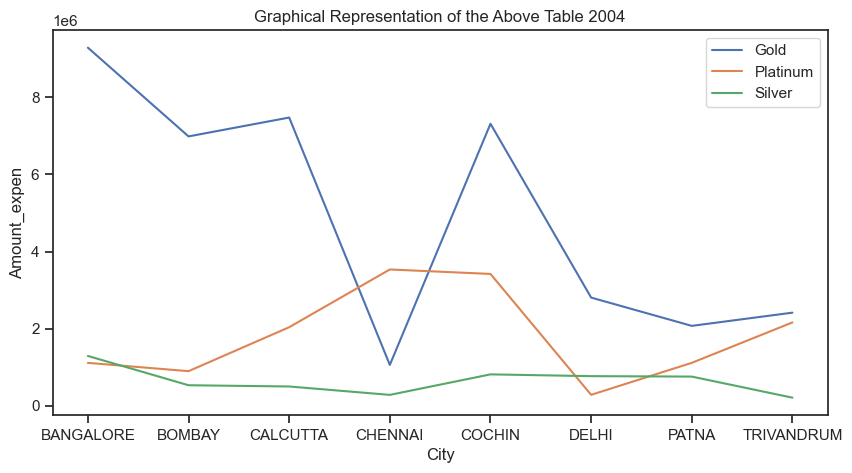

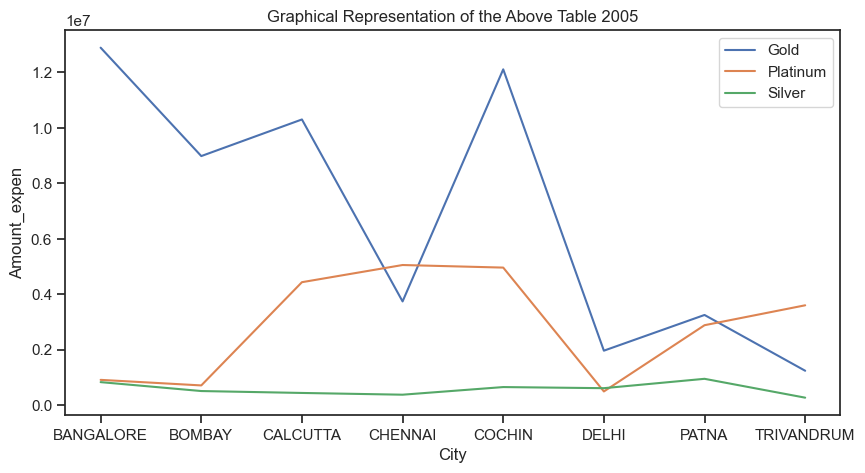

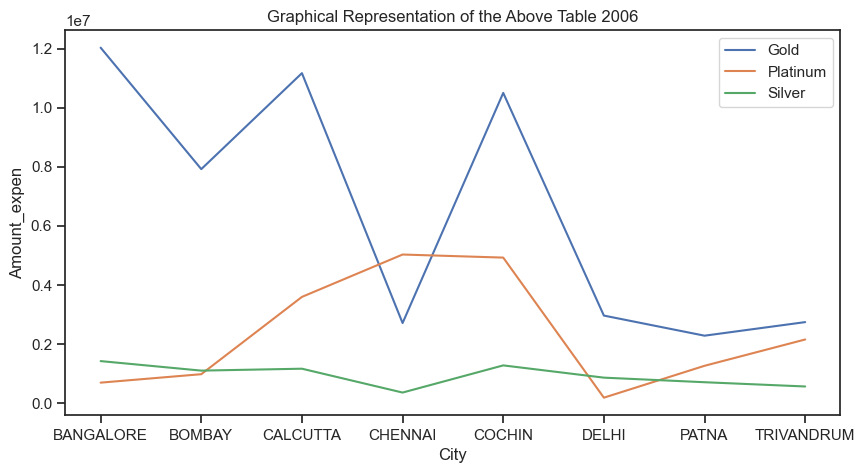

In [31]:
# 3b) Graphical representation of the same table.

for i in [2004, 2005, 2006]:
    plt.figure(figsize = (10,5))
    plt.title('Graphical Representation of the Above Table ' + str(i))
    sns.lineplot(graph_pot.loc[(graph_pot.expen_yr == i),:], x = 'City', y = 'Amount_expen', hue = 'Product')              
    plt.legend(loc = 'upper right')
    plt.show()


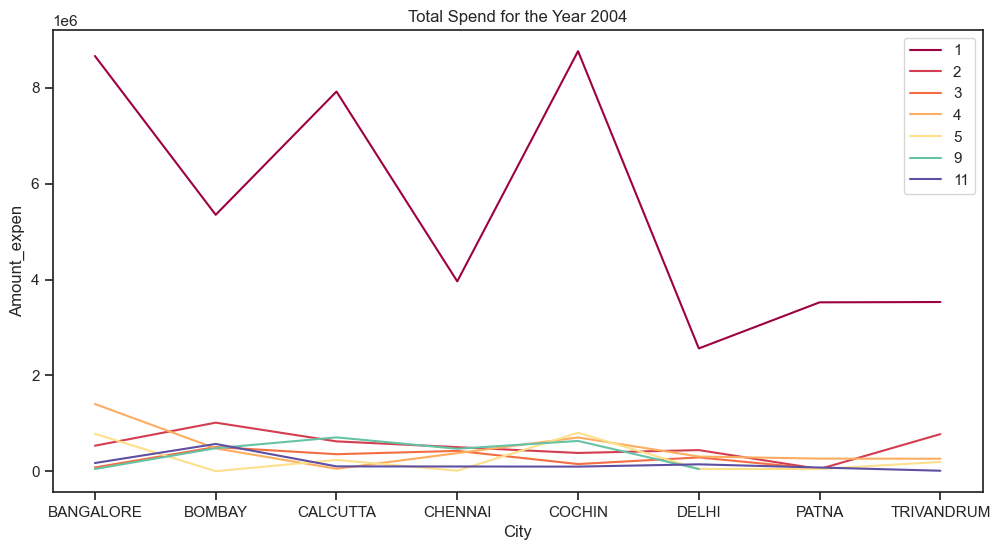

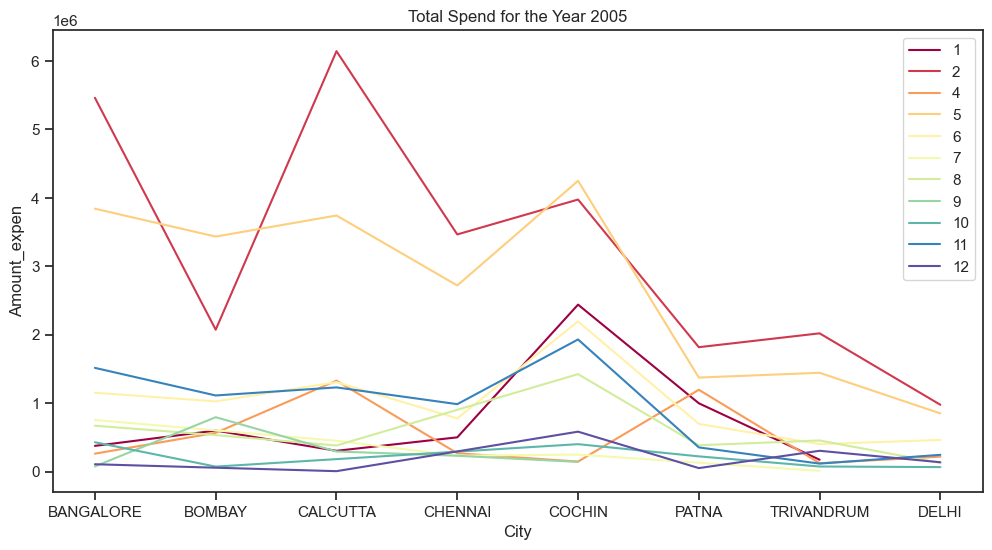

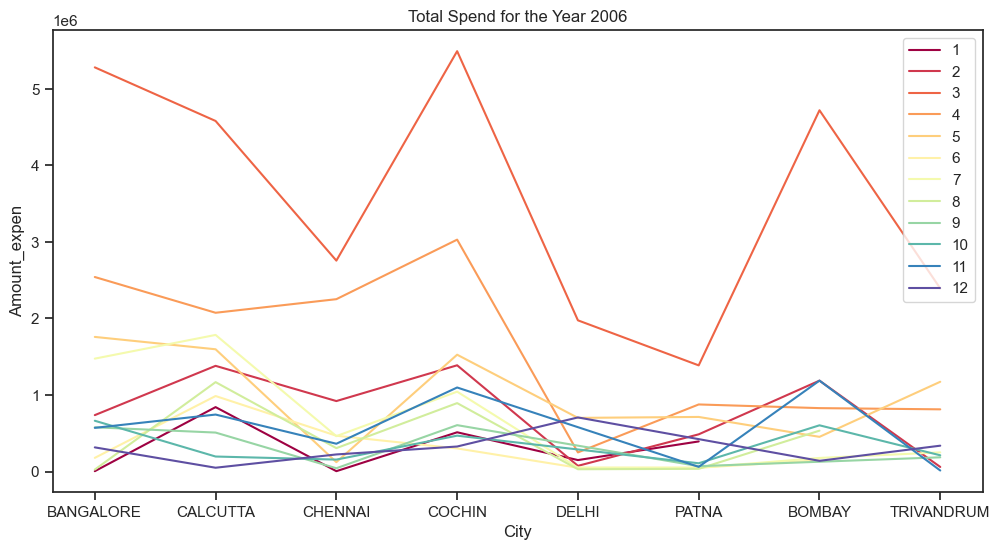

In [32]:
# 4) Create Graphs for:

# 4a) Monthly comparison of total spends, city wise

for i in [2004, 2005, 2006]:
    plt.figure(figsize = (12,6))
    plt.title('Total Spend for the Year ' + str(i))
    sns.lineplot(cred_df.loc[(cred_df.expen_yr == i),['expen_mon','City','Amount_expen']].groupby(by = ['expen_mon','City']).sum().reset_index(),
                   x = 'City', y = 'Amount_expen', hue = 'expen_mon', palette = 'Spectral', legend = 'full' )
    plt.legend(loc = 'upper right')
    plt.show()


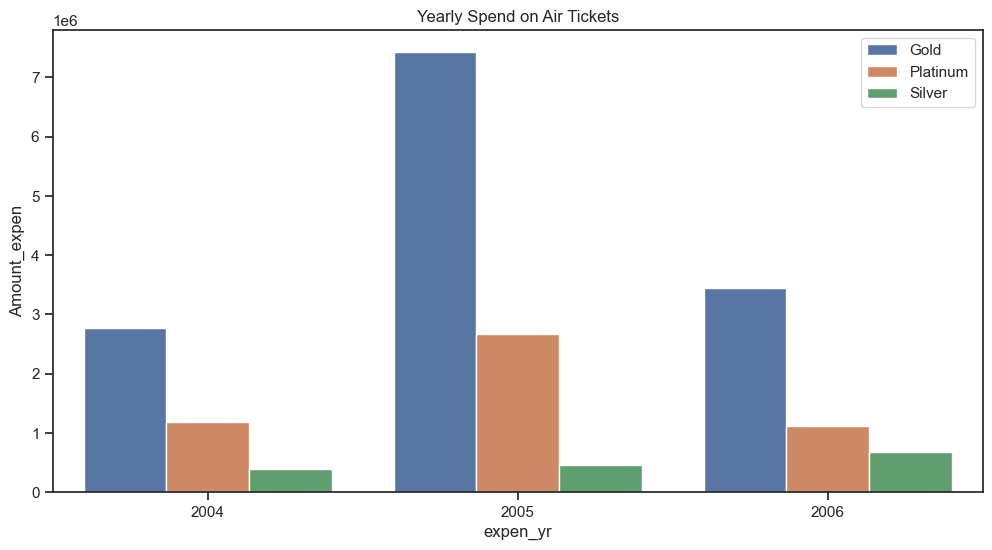

In [33]:
# Q4) b: Comparison of yearly spend on air tickets.

plt.figure(figsize = (12,6))
plt.title('Yearly Spend on Air Tickets')
sns.barplot(data = cred_df.loc[(cred_df.Type == 'AIR TICKET'),['expen_yr','Product','Amount_expen']].groupby(by = ['expen_yr','Product']).sum().reset_index(),
               x = 'expen_yr', y = 'Amount_expen', hue = 'Product')
plt.legend(loc ='upper right')
plt.show()

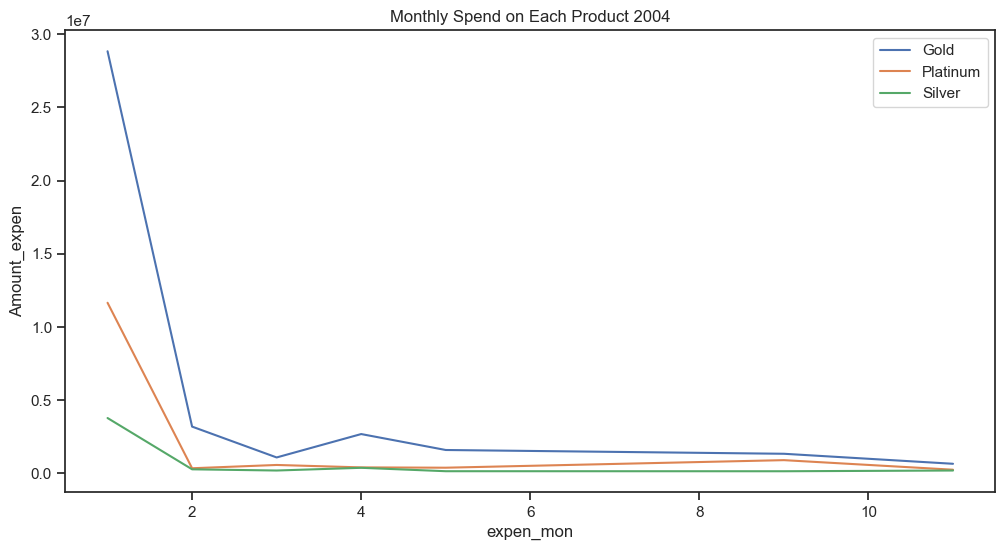

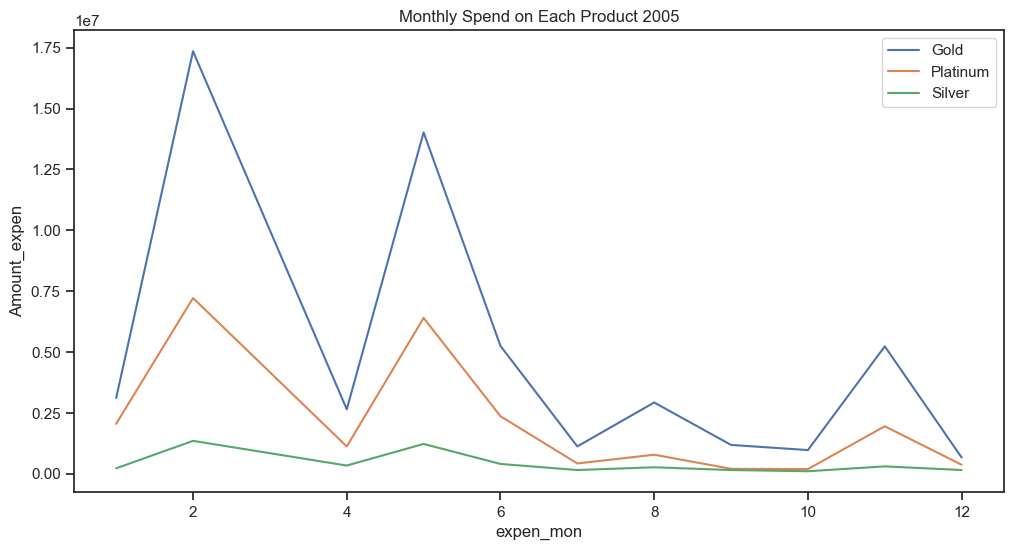

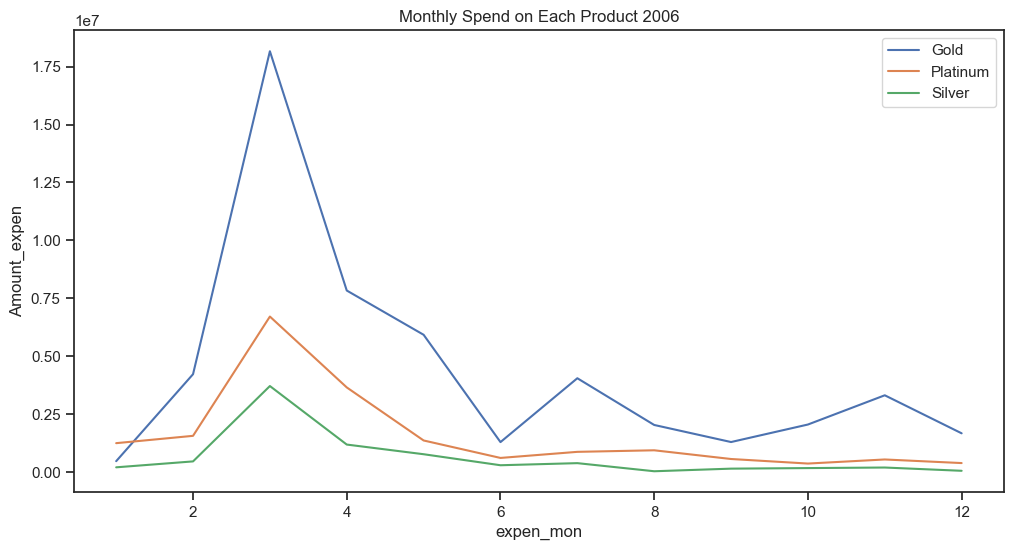

In [34]:
# Q4) c: Comparison of monthly spend for each product.(look for any seasonality that exists in terms of spend)

for i in [2004, 2005, 2006]:
    plt.figure(figsize = (12,6))
    plt.title('Monthly Spend on Each Product ' + str(i))
    sns.lineplot(cred_df.loc[(cred_df.expen_yr == i),['expen_mon','Product','Amount_expen']].groupby(by = ['expen_mon','Product']).sum().reset_index(),
                   x = 'expen_mon', y = 'Amount_expen', hue = 'Product')
    plt.legend(loc ='upper right')
    plt.show()

# In terms of seasonality - The first trimester of the years is observed to have an increase in the spend of customers.
# The last trimester of the years also shows an increase in spend.
# These could be due to festive offers, offered in the service areas, however more data and further analysis is required for 
# conclusive statements.

In [42]:
# Q5) Write user defined PYTHON function to perform the following analysis:

# You need to find top 10 customers for each city in terms of their repayment amount by different products and by different 
# time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period
# (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.


def test_1(y, m, p):
    cty_dn = {}
    cities = cred_df.City.unique()
    cities = cities.tolist()
    for i in cities:
        temp_df = cred_df.loc[(cred_df.repay_yr == y) & (cred_df.Product == p) & (cred_df.repay_mon.isin(m)) & (cred_df.City == i),
                             ['Customer', 'Amount_repay']].groupby(by = 'Customer').sum().sort_values(by = 'Amount_repay', ascending = False).reset_index().head(10)
        cty_dn[i] = temp_df.Customer
    return cty_dn

prod = input('Enter the Product (Gold/Platinum/Silver): ')
yr = int(input('Enter the Year (2004/2005/2006): '))

if yr == 2004:
    mon = []
    b = input('Number of months you want to check for( Available month num is 1,2,3,4,5,9,11, all-available) : ')
    if b == 'all-available':
        mon = [1,2,3,4,5,9,11]
    else:
        itr = list(range(0,int(b),1))
        for j in itr:
            mon.append(int(input('Enter the month number: ')))
    
elif yr == 2005 or yr == 2006:
    mon = []
    b = input('Number of months you want to check for( Available month num is 1,2,3,4,5,6,7,8,9,10,11,12,all-available) : ')
    if b == 'all-available':
        mon = [1,2,3,4,5,6,7,8,9,10,11,12]
    else:
        itr = list(range(0,int(b),1))
        for j in itr:
            mon.append(int(input('Enter the month number: ')))
else:
    print('Not Valid Input')
new_df = pd.DataFrame.from_dict(test_1(yr, mon, prod))
new_df.fillna(value = '-', inplace = True)
new_df

Enter the Product (Gold/Platinum/Silver): Platinum
Enter the Year (2004/2005/2006): 2004
Number of months you want to check for( Available month num is 1,2,3,4,5,9,11, all-available) : 3
Enter the month number: 1
Enter the month number: 2
Enter the month number: 5


,BANGALORE,CALCUTTA,COCHIN,BOMBAY,DELHI,PATNA,CHENNAI,TRIVANDRUM
0,A37,A40,A41,A36,A53,A55,A38,A39
1,A52,A49,A54,A51,-,-,A47,A48
2,A5,A20,A50,A4,-,-,A56,A97
3,A19,A99,A21,A33,-,-,-,-
4,-,A98,A3,-,-,-,-,-
